## Netflix Stock Price Data set 2002-2022
## About Dataset

This is a Data set for Stock Price of Netflix . This Data set start from 2002 to 2022 . It was collected from Yahoo Finance. I took this dataset from Kaggle

https://www.kaggle.com/datasets/meetnagadia/netflix-stock-price-data-set-20

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Correct file path for macOS
file_path = '/Users/saharawaji/Downloads/NFLX.csv'

# Read the CSV file
NFLX = pd.read_csv(file_path)

In [4]:

NFLX['Date'] = pd.to_datetime(NFLX['Date'])
NFLX = NFLX.set_index('Date')
NFLX.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.931429,7.961429,7.565714,7.640000,7.640000,17239600
2010-01-05,7.652857,7.657143,7.258571,7.358571,7.358571,23753100
2010-01-06,7.361429,7.672857,7.197143,7.617143,7.617143,23290400
2010-01-07,7.731429,7.757143,7.462857,7.485714,7.485714,9955400
2010-01-08,7.498571,7.742857,7.465714,7.614286,7.614286,8180900


## Plot your time series data with time on the horizontal axis.
1. Add a horizontal time as the sample mean.
2. Add a simple linear regression trend line with time as the independent variable.
3. Add a moving average of three to your plot.

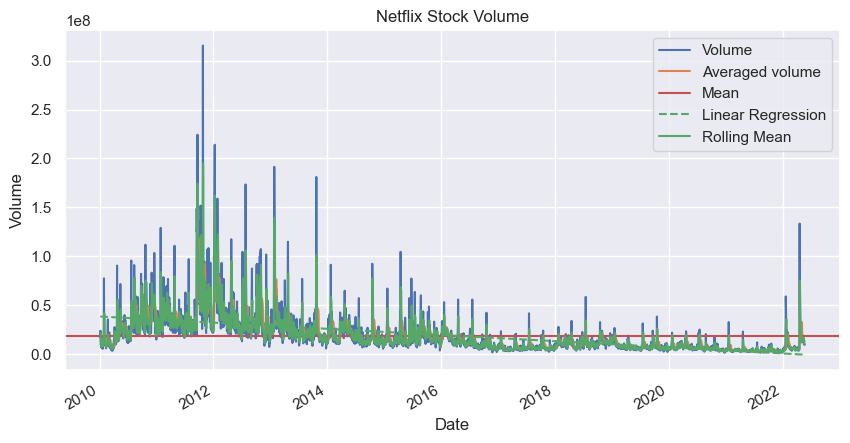

In [7]:

# plot the volume data and the rolling average of the volume
sns.lineplot(x=NFLX.index, y=NFLX['Volume'], label='Volume')
NFLX['Volume'].rolling(window=12).mean().plot(label='Averaged volume')

# calculate the sample mean and plot as a horizontal line
mean_val = NFLX['Volume'].mean()
plt.axhline(mean_val, color='r', label='Mean')

# calculate and plot the linear regression trend line
x_values = NFLX.index.values.astype('int64') // 10 ** 9 // 86400
z = np.polyfit(x_values, NFLX['Volume'], 1)
p = np.poly1d(z)
plt.plot(NFLX.index.values, p(x_values), "g--", label='Linear Regression')

# add a moving average of three
NFLX['rolling_mean'] = NFLX['Volume'].rolling(window=3).mean()
NFLX.plot(y='rolling_mean', ax=plt.gca(), label='Rolling Mean')


# add labels and legend
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Netflix Stock Volume')
plt.legend()
plt.show()

## Plot the ACF for your time series.
Indicate if the ACF cuts off (and when) or if it trails off.



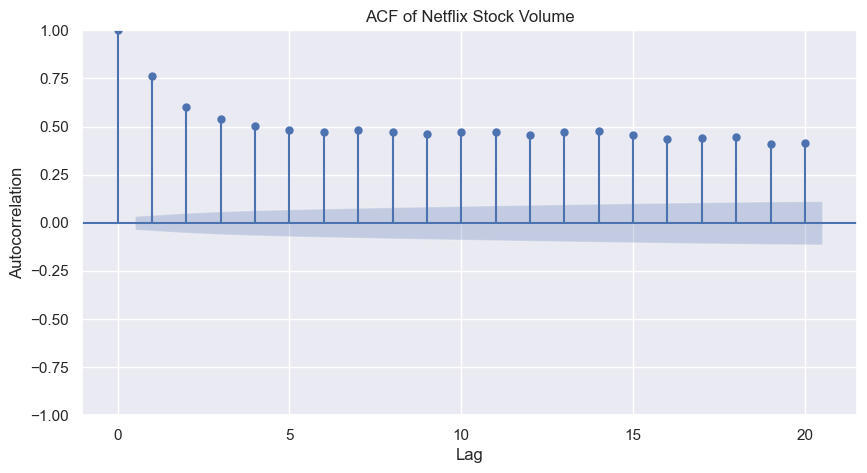

In [8]:
from statsmodels.graphics.tsaplots import plot_acf

# plot the autocorrelation function
plot_acf(NFLX['Volume'], lags=20)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF of Netflix Stock Volume')

plt.show()

## Plot the PACF for your time series.
Indicate if the PACF cuts off (and when) or if it trails off.

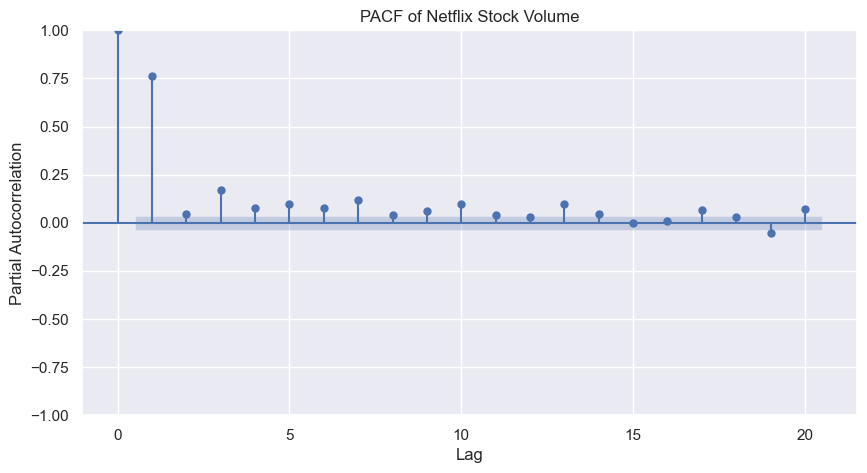

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf

# plot the partial autocorrelation function
plot_pacf(NFLX['Volume'], lags=20)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('PACF of Netflix Stock Volume')

plt.show()